## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Predicting a numeric outcome is called regression, and predicting a categorical outcome is called classification.
2. A confusion table is a table used to evaluate the performance of a classification model. It compares the predicted labels to the actual labels to measure how well the model is performing. This matrix helps assess several important performance metrics: accuracy, precision, recall, F1 score and specificity.
3. The Sum of Squared Errors (SSE) quantifies the total discrepancy between a model’s predicted values and the actual observed values. It is calculated by summing the squared differences between each actual value and its corresponding predicted value. A lower SSE indicates that the model’s predictions are closer to the actual data points, suggesting a better fit.
4. Underfitting occurs when your model is too simple to reliably explain the phenomenon you are interested in, and overfitting occurs when your model is too complex to reliably explain the phenomenon you are interested in.
5. Splitting the data into training and testing sets and selecting the optimal k by evaluating accuracy or SSE on the test set improves model performance by ensuring that the model generalizes well to unseen data. The training set is used to fit the model, allowing it to learn patterns, while the test set evaluates how well the model performs on new, independent data. This prevents overfitting, where the model memorizes the training data but fails to make accurate predictions on new inputs. By choosing k based on test set performance, we strike a balance between underfitting (high bias, where k is too large and the model is too simplistic) and overfitting (high variance, where k is too small and the model is too sensitive to noise). Evaluating accuracy or SSE on the test set helps determine the best k value that minimizes prediction errors, ensuring the model is neither too rigid nor too complex.
6.
Reporting a class label (e.g., "Spam" or "Not Spam") provides a clear and interpretable prediction, making it easy for decision-making processes that require a definitive answer. This approach is useful in scenarios where immediate action is needed, such as detecting fraudulent transactions or classifying medical conditions. However, the major weakness of class labels is that they do not convey the model’s confidence in its prediction. A classification model may be highly uncertain about its choice, yet still report a single label, which can be misleading in cases where uncertainty matters.

On the other hand, reporting a probability distribution over class labels (e.g., 70% chance of "Spam," 30% chance of "Not Spam") offers a more nuanced view by showing the model’s level of confidence in each possible outcome. This is particularly useful in applications where uncertainty should be factored into decision-making, such as in medical diagnosis, financial risk assessments, or recommendation systems. The main weakness of probability distributions is that they require interpretation, making them less immediately actionable. Additionally, they rely on well-calibrated models—if a model is poorly calibrated, the probability scores may be unreliable, leading to misguided decisions.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [12]:
#question 1 part 1
import pandas as pd
import numpy as np
import seaborn as sns

url = "https://raw.githubusercontent.com/ds4e/knn/refs/heads/main/data/USA_cars_datasets.csv"
df = pd.read_csv(url,low_memory=False)
# Keep only the required columns
df = df[['price', 'year', 'mileage']]
df = df.dropna()
print(df.head())
print(df.info())

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   price    2499 non-null   int64
 1   year     2499 non-null   int64
 2   mileage  2499 non-null   int64
dtypes: int64(3)
memory usage: 58.7 KB
None


In [13]:
#question 1 part 2
# Define MinMax normalization function
def maxmin(z):
    return (z - z.min()) / (z.max() - z.min())

# Apply normalization to 'year' and 'mileage'
df[['year', 'mileage']] = df[['year', 'mileage']].apply(maxmin)

# Display the first few rows to verify normalization
print(df.head())

# Summary statistics to check scaling
print(df.describe())


   price      year   mileage
0   6300  0.744681  0.269287
1   2899  0.808511  0.187194
2   5350  0.957447  0.038892
3  25000  0.872340  0.063016
4  27700  0.957447  0.006537
              price         year      mileage
count   2499.000000  2499.000000  2499.000000
mean   18767.671469     0.930091     0.051377
std    12116.094936     0.073248     0.058654
min        0.000000     0.000000     0.000000
25%    10200.000000     0.914894     0.021088
50%    16900.000000     0.957447     0.034742
75%    25555.500000     0.978723     0.062354
max    84900.000000     1.000000     1.000000


In [14]:
# question 1 part 3
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df[['year', 'mileage']]  # Predictor variables
y = df['price']  # Target variable

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes to confirm the split
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")


Training set size: 1999 rows
Testing set size: 500 rows


k = 3, MSE = 148065935.52
k = 10, MSE = 117399126.11
k = 25, MSE = 112576160.82
k = 50, MSE = 110202549.30
k = 100, MSE = 112253932.82
k = 300, MSE = 114496301.83


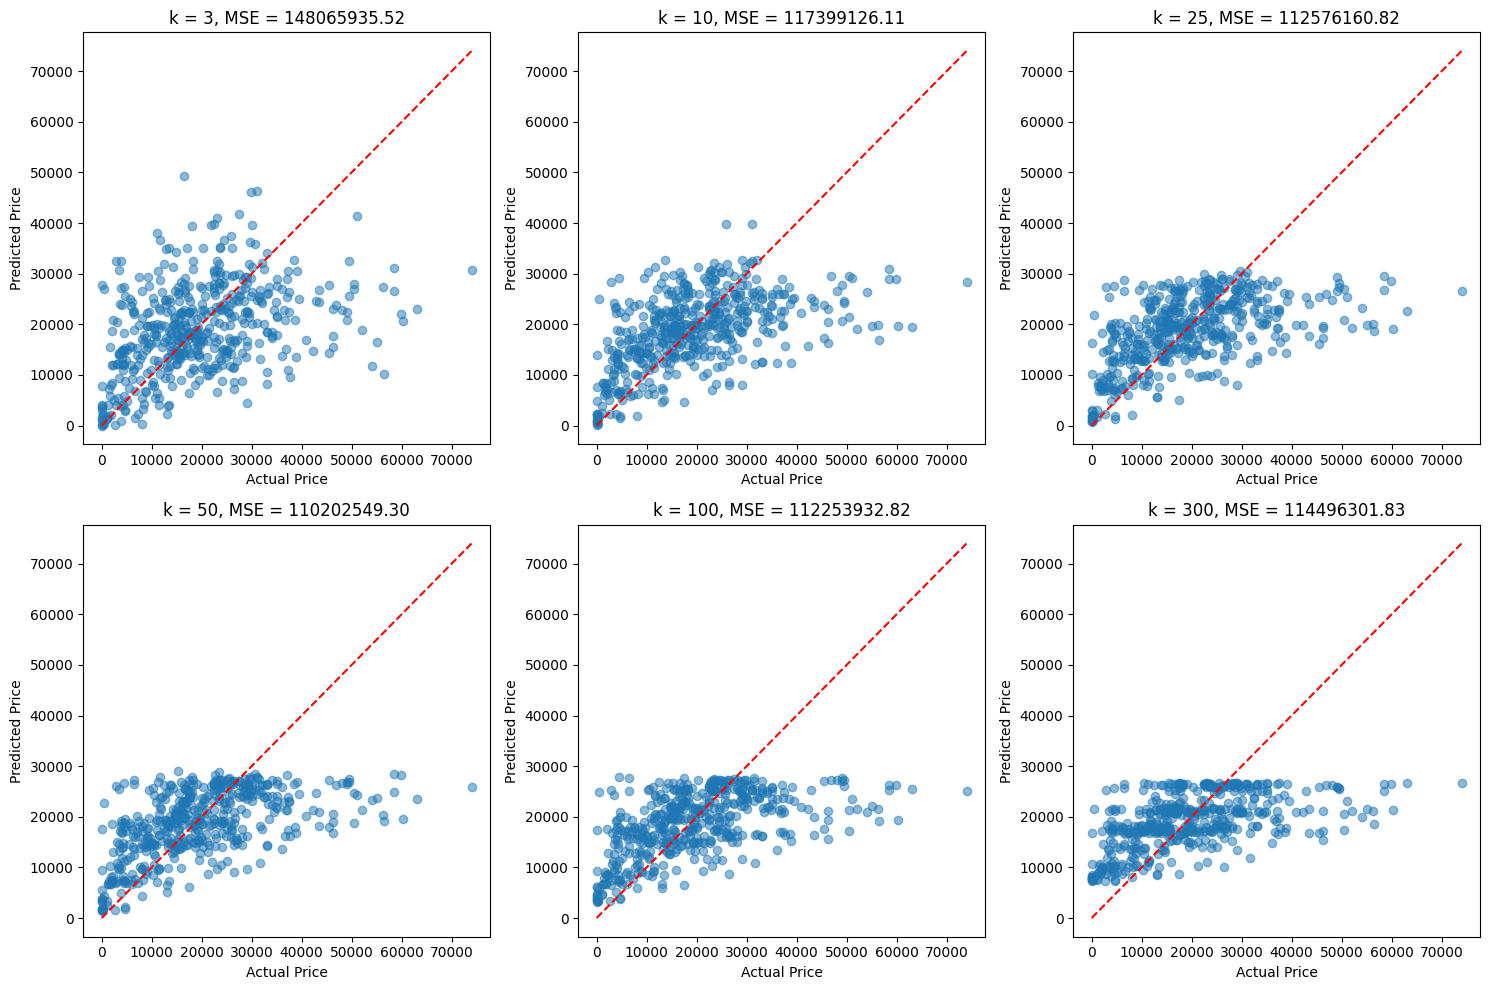

In [17]:
# question 1 part 4
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Define k values to test
k_values = [3, 10, 25, 50, 100, 300]

# Create figure for subplots
plt.figure(figsize=(15, 10))

# Iterate through different k values
for i, k in enumerate(k_values):
    # Initialize and fit the kNN model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict prices on the test set
    y_pred = knn.predict(X_test)

    # Compute Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f"k = {k}, MSE = {mse:.2f}")

    # Scatter plot: Actual vs. Predicted Prices
    plt.subplot(2, 3, i + 1)  # Arrange plots in 2 rows, 3 columns
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"k = {k}, MSE = {mse:.2f}")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Identity line

# Show all plots
plt.tight_layout()
plt.show()

With small
𝑘(e.g., 3, 10), predictions closely follow actual values but are highly variable and noisy, leading to overfitting. The scatterplots show significant deviations from the identity line, and MSE is high due to the model capturing too much noise.

For moderate
𝑘(e.g., 25, 50), predictions become smoother and more stable. The model balances bias and variance, reducing noise while still capturing meaningful trends. MSE decreases, indicating improved generalization.

With large
𝑘(e.g., 100, 300), predictions become overly smoothed, failing to capture variations in car prices. The scatterplots show clustering around average values, signaling underfitting, and MSE starts increasing again.

In [25]:
# question 1 part 5
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define k values to try
k_bar = 100
SSE = []

# Loop through different k values
for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1)  # Use k+1 for consistency with class notes
    fitted_model = model.fit(X_train.values, y_train)  # Train the model
    y_hat = fitted_model.predict(X_test.values)  # Predict values for test set
    SSE.append(np.sum((y_test - y_hat) ** 2))  # Compute SSE

# Find the k that minimizes SSE
SSE_min = np.min(SSE)  # Find the lowest recorded SSE
min_index = np.where(SSE == SSE_min)  # Find indices where SSE is minimum
k_star = min_index[0] + 1  # Adjust for k+1 indexing (class notes approach)

print(f"Optimal k: {k_star[0]}")



Optimal k: 59


# question 1 part 6
For small k values, k = 3 and 10, the model closely followed individual data points, resulting in high variance. Predictions appeared highly scattered around the identity line, with many points deviating significantly. This suggests **overfitting**, where the model captures noise along with patterns, leading to unstable and inconsistent predictions.

As k increased to k = 25 and 50, predictions became more stable and aligned better with the actual prices. The scatterplot showed a tighter clustering around the identity line, indicating a **balanced model** that generalizes well without excessive variance. The Sum of Squared Errors (SSE) was minimized in this range, confirming that the model struck a good balance between complexity and generalization.

For large k values k = 100 and 300, the model averaged over too many neighbors, causing **underfitting**. The scatterplots showed compressed predictions that failed to capture price variations, with many points clustering toward the middle of the distribution. The model became overly simplistic, smoothing out meaningful patterns and increasing SSE again.


**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data.

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data.
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE.
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.